In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve
import matplotlib.pyplot as plt

In [2]:
# Sample dataset: Study hours and whether students passed or failed
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

   StudyHours  Pass
0           1     0
1           2     0
2           3     0
3           4     0
4           5     0


Here, StudyHours is our **feature**, and Pass is the **target label**, where 0 indicates failure and 1 indicates passing.

In [3]:
# Features (X) and Target (y)
X = df[['StudyHours']]  # Feature(s)
y = df['Pass']          # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")


Training data: (8, 1), (8,)
Testing data: (2, 1), (2,)


In [4]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [-6.28495636]
Coefficient: [1.14270903]


- Intercept:
The intercept, also known as the bias term, determines the model’s baseline prediction.
Mathematically, it represents the log-odds (log(p / (1 − p))) of the target event when all predictors are zero.
Intuitively, it allows the logistic regression curve to shift vertically — controlling how likely the event is before any features come into play.
Without this term, the model’s decision boundary would always pass through the origin, reducing flexibility.

- Coefficient: This value indicates how much the log odds — that is, the natural logarithm of the odds of passing (p / (1 − p)) — change with each additional hour of study.
In other words, for every one-hour increase in study time, the log odds of passing increase by the coefficient value.
Exponentiating this coefficient (e^β) gives the odds ratio, showing how many times the odds of passing multiply for each extra hour of study.


In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)  # Final predicted class labels
y_pred_proba = model.predict_proba(X_test) # Probability predictions for each class

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred) # [1 0]
print("\nProbability Predictions:")
for i, proba in enumerate(y_pred_proba):
    print(f"Sample {i}: Class 0 = {proba[0]:.3f}, Class 1 = {proba[1]:.3f}")

print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [1 0]

Probability Predictions:
Sample 0: Class 0 = 0.018, Class 1 = 0.982
Sample 1: Class 0 = 0.982, Class 1 = 0.018
Actual Outcomes: [1 0]


In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# ------------------------------
# 2️⃣ ROC curve and AUC
# ------------------------------

# Extract probabilities for the positive class (usually class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc:.3f}")

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


ROC AUC: 1.000


- Accuracy: The percentage of correctly predicted outcomes out of all predictions
- Confusion matrix: A table that shows the number of correct and incorrect predictions categorized by true positives, true negatives, false positives, and false negatives
- Classification report: A report that provides detailed metrics such as precision, recall, and F1 score for each class

/Users/isdance/Desktop/projects/coursera-microsoft-ml-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


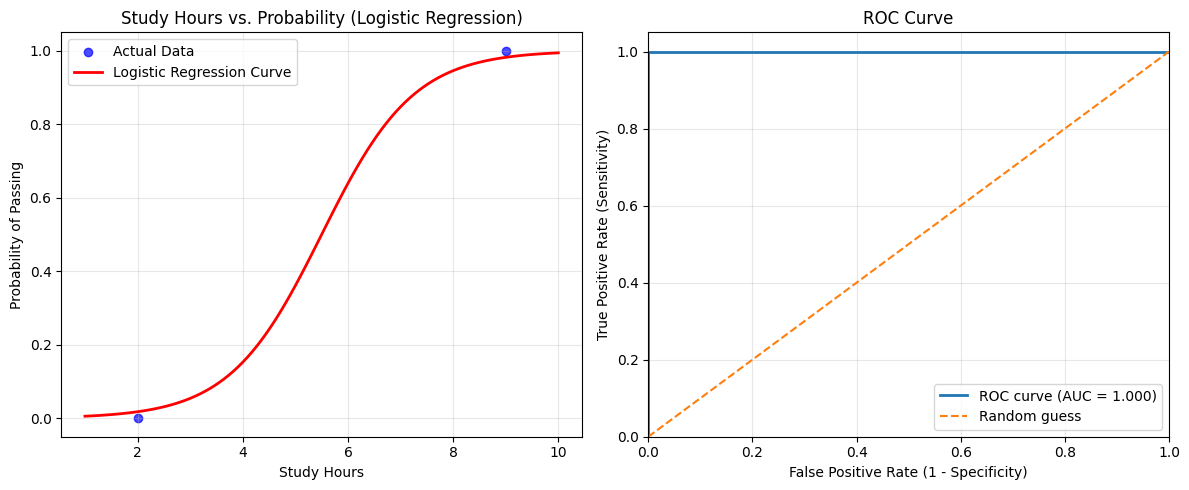

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ------------------------------
# 1) Probability curve (left subplot)
# ------------------------------

# Create a range of study hours for plotting
study_hours_range = np.linspace(X.min(), X.max(), 100)

# Calculate predicted probabilities using the sigmoid (model's predict_proba)
y_prob_curve = model.predict_proba(study_hours_range.reshape(-1, 1))[:, 1]

# Prepare predicted probabilities for ROC on the test set
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# Create a figure with two subplots: left = prob curve, right = ROC
plt.figure(figsize=(12, 5))

# Left subplot: logistic regression probability curve
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', alpha=0.7, label='Actual Data')
plt.plot(study_hours_range, y_prob_curve, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Study Hours vs. Probability (Logistic Regression)')
plt.legend()
plt.grid(True, alpha=0.3)

# ------------------------------
# 2) ROC curve (right subplot)
# ------------------------------

# Compute ROC points and AUC using positive-class probabilities on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

# Right subplot: ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')  # baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


This visualization helps you understand the relationship between the number of study hours and the likelihood of passing. The sigmoid curve shows the probability of passing as the number of study hours increases.